In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Churn_data.csv")

In [3]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910160,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,None,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [4]:
data.isnull().sum()

Customer_ID                    0
Gender                         0
Age                            0
Married                        0
State                          0
Number_of_Referrals            0
Tenure_in_Months               0
Value_Deal                     0
Phone_Service                  0
Multiple_Lines                 0
Internet_Service               0
Internet_Type                  0
Online_Security                0
Online_Backup                  0
Device_Protection_Plan         0
Premium_Support                0
Streaming_TV                   0
Streaming_Movies               0
Streaming_Music                0
Unlimited_Data                 0
Contract                       0
Paperless_Billing              0
Payment_Method                 0
Monthly_Charge                 0
Total_Charges                  0
Total_Refunds                  0
Total_Extra_Data_Charges       0
Total_Long_Distance_Charges    0
Total_Revenue                  0
Customer_Status                0
Churn_Cate

In [5]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [6]:
data.shape

(6007, 32)

In [7]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'],axis = 1)

In [8]:
# List of columns to be label encoded

columns_to_encode = [

    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',

    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',

    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',

    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',

    'Payment_Method'

]



In [9]:
from sklearn.preprocessing import LabelEncoder

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
# Encode categorical variables except the target variable

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    data[column] = label_encoders[column].fit_transform(data[column])

In [11]:
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

In [12]:
 # Split data into features and target

X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

In [13]:
cormat = data.corr()
round(cormat,2)

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
Gender,1.00,0.04,0.02,0.02,-0.02,0.04,0.00,-0.03,-0.02,0.02,...,-0.01,-0.01,0.01,-0.02,-0.01,-0.01,-0.00,-0.01,-0.01,-0.02
Age,0.04,1.00,0.01,-0.02,-0.02,0.15,0.04,0.01,0.10,0.10,...,0.01,0.11,-0.10,0.13,0.05,0.01,0.03,-0.01,0.04,0.11
Married,0.02,0.01,1.00,-0.01,-0.02,0.01,-0.00,0.01,-0.00,-0.01,...,-0.01,-0.01,-0.02,-0.01,-0.01,-0.00,0.01,0.02,-0.00,-0.01
State,0.02,-0.02,-0.01,1.00,-0.00,-0.02,-0.03,0.01,0.03,-0.00,...,0.01,-0.01,-0.02,0.02,0.02,-0.01,-0.00,0.02,0.02,-0.04
Number_of_Referrals,-0.02,-0.02,-0.02,-0.00,1.00,-0.01,-0.00,-0.02,-0.05,-0.01,...,0.01,-0.02,0.02,-0.01,-0.00,0.02,-0.00,0.01,0.00,-0.01
Tenure_in_Months,0.04,0.15,0.01,-0.02,-0.01,1.00,0.01,-0.00,0.00,-0.00,...,-0.01,0.01,-0.02,-0.01,-0.01,0.01,0.02,0.00,-0.00,0.01
Value_Deal,0.00,0.04,-0.00,-0.03,-0.00,0.01,1.00,-0.01,-0.15,-0.01,...,-0.23,0.00,-0.00,-0.09,-0.33,0.01,-0.02,-0.25,-0.34,0.17
Phone_Service,-0.03,0.01,0.01,0.01,-0.02,-0.00,-0.01,1.00,0.30,-0.17,...,0.00,0.01,-0.02,0.24,0.12,0.01,-0.03,0.31,0.19,0.01
Multiple_Lines,-0.02,0.10,-0.00,0.03,-0.05,0.00,-0.15,0.30,1.00,0.20,...,0.10,0.15,-0.14,0.46,0.45,0.03,0.06,0.30,0.45,0.01
Internet_Service,0.02,0.10,-0.01,-0.00,-0.01,-0.00,-0.01,-0.17,0.20,1.00,...,-0.25,0.32,-0.24,0.72,0.37,0.01,0.14,-0.05,0.28,0.22


In [14]:
import seaborn as sns

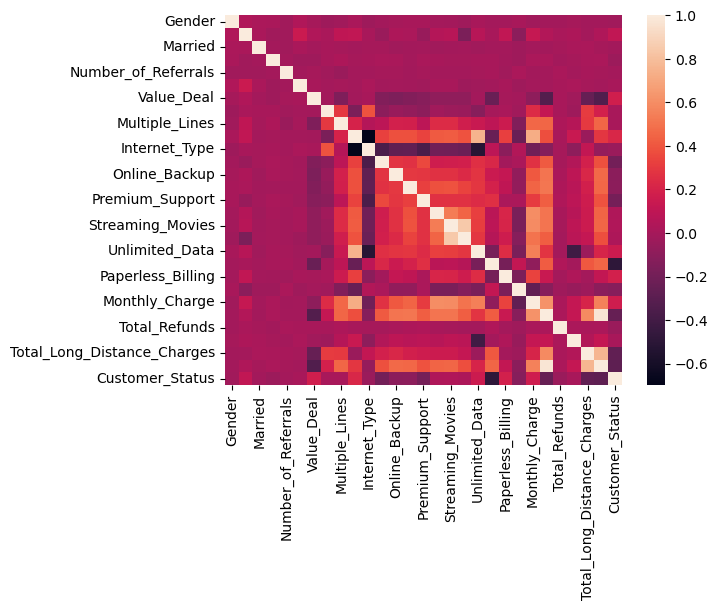

In [15]:
sns.heatmap(cormat);

In [16]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the Random Forest Classifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

 

# Train the model

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = rf_model.predict(X_test)

In [20]:
# Evaluate the model

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 

Confusion Matrix:
[[783  64]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



In [21]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

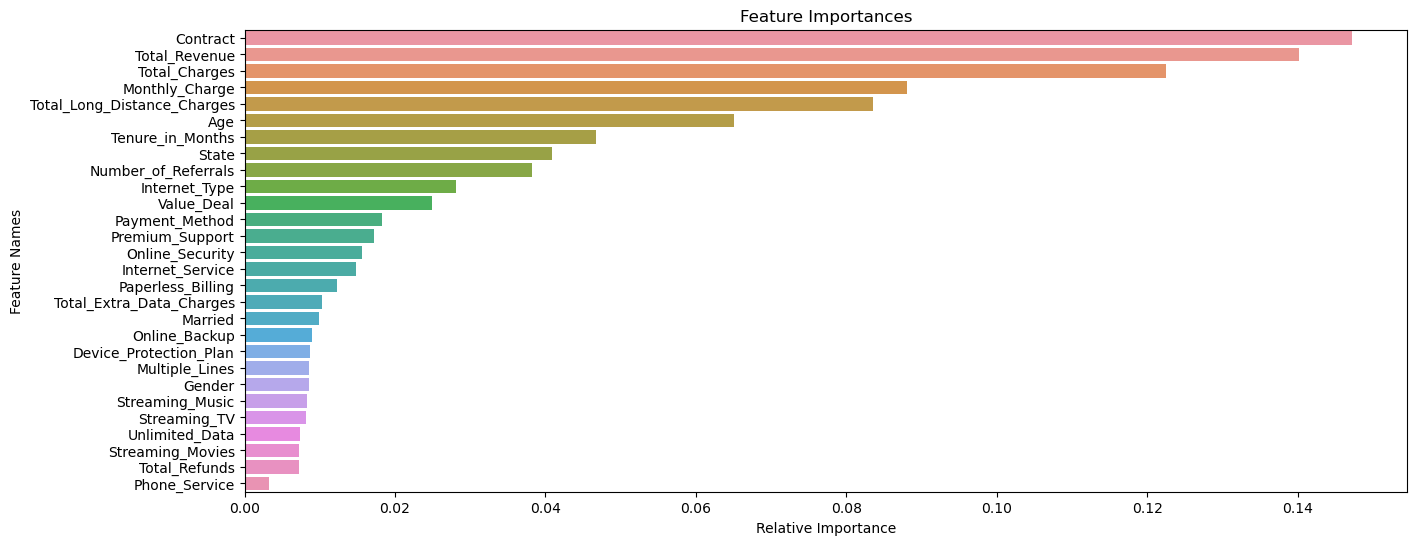

In [22]:
# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

In [27]:
new_data = pd.read_excel('Joined_data.xlsx')

In [28]:
# Retain the original DataFrame to preserve unencoded columns

original_data = new_data.copy()

 

# Retain the Customer_ID column

customer_ids = new_data['Customer_ID']

 

# Drop columns that won't be used for prediction in the encoded DataFrame

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 

# Encode categorical variables using the saved label encoders

for column in new_data.select_dtypes(include=['object']).columns:

    new_data[column] = label_encoders[column].transform(new_data[column])

 

# Make predictions

new_predictions = rf_model.predict(new_data)

 

# Add predictions to the original DataFrame

original_data['Customer_Status_Predicted'] = new_predictions

 

# Filter the DataFrame to include only records predicted as "Churned"

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

 

# Save the results

original_data.to_csv(r"C:\Users\rakes\Videos\Project 5\data_churn\Data & Resources\Data\Predictions.csv", index=False)